Careful, these constants may be different for you:

In [1]:
DATA_PATH = '~/Desktop/sdss_dr7_photometry_source.csv.gz'

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.neighbors

%matplotlib inline

First import the training and testing sets

In [3]:
def load_data(x_cols=['psfMag_u', 'psfMag_g', 'psfMag_r', 'psfMag_i', 'psfMag_z'],
              y_col='redshift',
              class_col='class',
              class_val='Galaxy',
              train_samples_num=1000000,
              test_samples_num=500000):

    data_iter = pd.read_csv(
        DATA_PATH,
        iterator=True,
        chunksize=100000,
        usecols=x_cols + [y_col, class_col])


    # Filter out anything that is not a galaxy without loading the whole file into memory.
    data = pd.concat(chunk[chunk[class_col] == class_val]
                     for chunk in data_iter)

    train_y = data[:train_samples_num][y_col].as_matrix()
    train_X = data[:train_samples_num][x_cols].as_matrix()
    
    test_y = data[-test_samples_num:][y_col].as_matrix()
    test_X = data[-test_samples_num:][x_cols].as_matrix()
    
    return (train_y, train_X), (test_y, test_X)

(train_y, train_X), (test_y, test_X) = load_data()

Fit the training data.

In [4]:
kde = sklearn.neighbors.KernelDensity(
        bandwidth=.2,  # By experimentation.
        kernel='epanechnikov',  # Resembles Gaussian within short distance, but is faster.
        leaf_size=400,  # For speed.
        rtol=1e-5  # Slightly increased accuracy, but better speed.
    ).fit(train_X)

Find densities on the test set. __This can take a while.__

In [5]:
test_densities = kde.score_samples(test_X)
test_densities = np.exp(test_densities)

Plot.

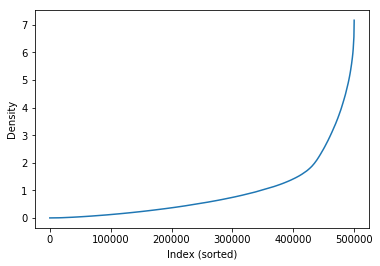

In [6]:
def plot():
    x = range(len(test_densities))
    y = sorted(test_densities)
    plt.plot(x, y)
    plt.ylabel('Density')
    plt.xlabel('Index (sorted)')

plot()

This time a histogram.

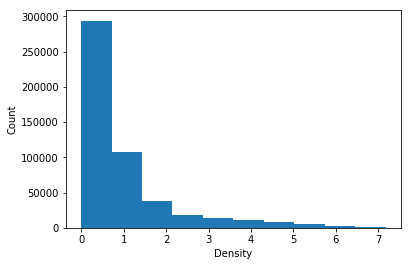

In [7]:
def histogram():
    plt.hist(test_densities)
    plt.ylabel('Count')
    plt.xlabel('Density')
    
histogram()